In [1]:
import os
os.chdir("/content/drive/Shareddrives/yujung kim/Study/Python/time_series")

In [5]:
!pip install fbprophet
!pip install prophet

# read_data

In [59]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timezone, timedelta, time

In [60]:
with open('data/pv.pickle', 'rb') as f:
    pv = pickle.load(f)

In [61]:
pv['datetime_no_tz'] = [i.replace(tzinfo=None) for i in pv['datetime']]

In [62]:
pv.head()

,time,power,datetime,month,day,alt,azi,rad,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,datetime_no_tz
0,01/01/06 00,0.0,2006-01-01 00:00:00-06:00,1,1,-82.519778,6.327078,0.0,17.6,15.9,90.0,NaN,NaN,130.0,5.4,NaN,1013.9,NaN,NaN,2006-01-01 00:00:00
1,01/01/06 01,0.0,2006-01-01 01:00:00-06:00,1,1,-74.001270,66.094544,0.0,15.1,14.5,96.0,0.0,NaN,180.0,11.2,NaN,1014.7,NaN,NaN,2006-01-01 01:00:00
2,01/01/06 02,0.0,2006-01-01 02:00:00-06:00,1,1,-61.530551,82.353403,0.0,15.1,14.5,96.0,0.0,NaN,200.0,11.2,NaN,1015.0,NaN,NaN,2006-01-01 02:00:00
3,01/01/06 03,0.0,2006-01-01 03:00:00-06:00,1,1,-48.633108,91.048671,0.0,15.7,15.1,96.0,0.0,NaN,180.0,11.2,NaN,1014.9,NaN,NaN,2006-01-01 03:00:00
4,01/01/06 04,0.0,2006-01-01 04:00:00-06:00,1,1,-35.752419,97.771663,0.0,15.7,15.1,96.0,0.0,NaN,170.0,9.4,NaN,1014.7,NaN,NaN,2006-01-01 04:00:00


# Prophet

- Trend

- Seasonality

- Event

In [63]:
from fbprophet import Prophet 
from prophet.plot import plot_plotly, plot_components_plotly
from fbprophet.plot import add_changepoints_to_plot

In [64]:
pv_temp = pv[['datetime_no_tz', 'power']]
pv_temp.columns = ['ds', 'y']

In [74]:
pv_temp = pv_temp[pv_temp['ds']<datetime(2006,4,1,00)]

In [75]:
# pv_temp['cap'] = 700 # 상한값 지정
# pv_temp['floor'] = 0 # 하한값 지정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [122]:
m = Prophet(
    # trend
    # changepoint_prior_scale=0.3,
    # seasonality
    # daily_seasonality=20,
    # weekly_seasonality=20,
    # yearly_seasonality=False,
    # seasonality_prior_scale=0.5
)

# m.add_seasonality(name='hourly', period=1/12, fourier_order=20)

In [123]:
m.fit(pv_temp)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [124]:
future = m.make_future_dataframe(freq='H',periods=24*7) # freq='H' -> 시간 단위 데이터, periods -> 예측할 obs 갯수
forecast = m.predict(future)

In [125]:
plot_plotly(m, forecast)

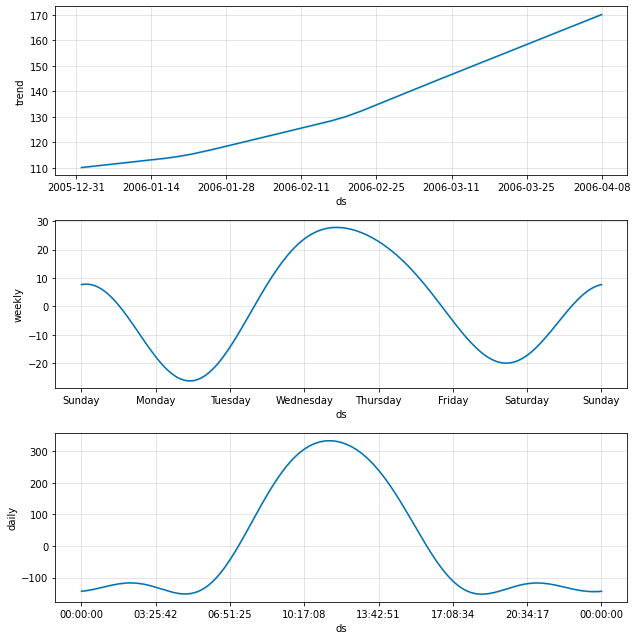

In [126]:
fig = m.plot_components(forecast)

# trend

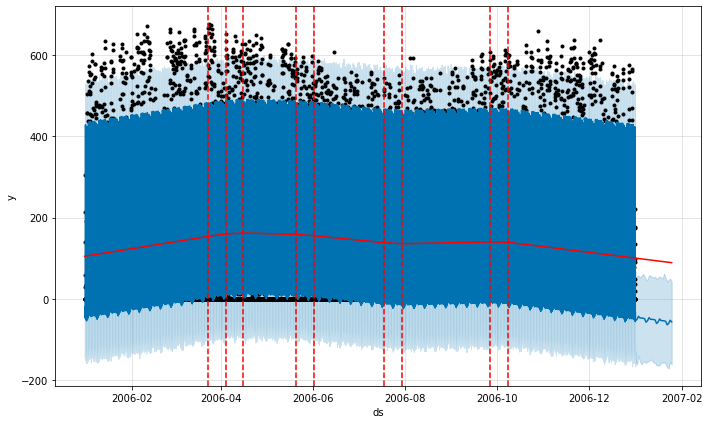

In [71]:


fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

# seasonality

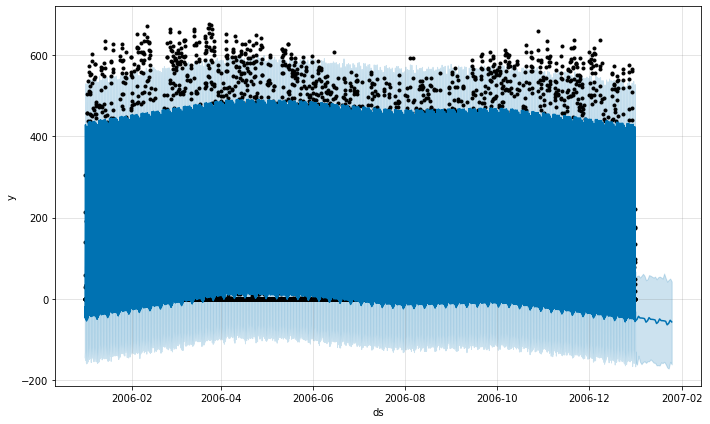

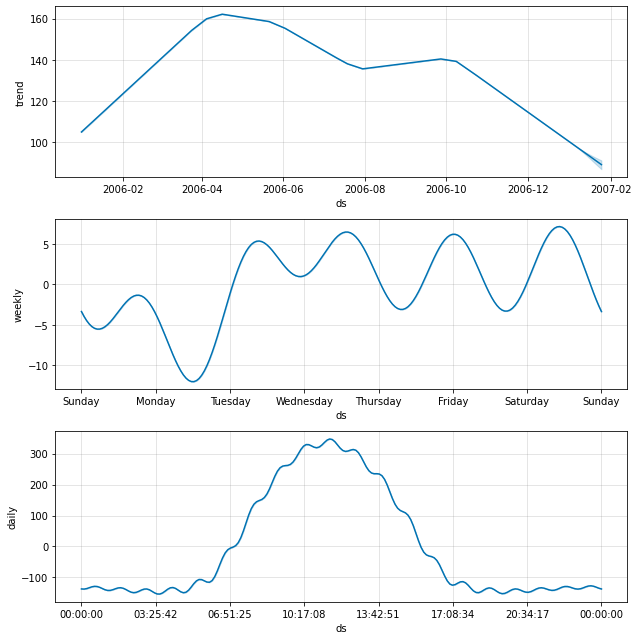

In [73]:
m = Prophet(
    # trend
    changepoint_prior_scale=0.3,
    # seasonality
    daily_seasonality=10,
    weekly_seasonality=5,
    yearly_seasonality=False,

)

m.fit(pv_temp)
fig1 = m.plot(forecast)
fig = m.plot_components(forecast)

In [58]:
# Python


plot_plotly(m, forecast)